In [1]:
# https://www.scikit-yb.org/en/latest/index.html
df = pd.read_parquet('walmart.parquet').sample(n=4000)
df.head(1)

,weekly_sales,sid,dept,store,type,size,temperature_stdev,fuel_price_avg,fuel_price_stdev,cpi_avg,cpi_stdev,unemployment_avg,unemployment_stdev,holidayfreq
7984,3,176648,26,17,2,93188,49.916667,6.437657,3.412667,0.515931,129.086919,2.351671,6.343,0.719269


In [2]:
from sklearn.model_selection import train_test_split

X = df[df.columns[df.columns != 'weekly_sales']]
y = df['weekly_sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

BalancedBinningReference(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc19b991668>,
                         bins=3, target='y')

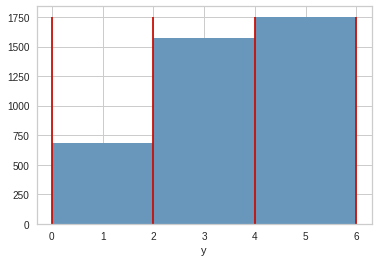

In [9]:
# https://www.scikit-yb.org/en/latest/api/target/binning.html
from yellowbrick.target import BalancedBinningReference

viz = BalancedBinningReference(bins=3)
viz.fit(y)
viz.poof()

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc19b8370f0>,
             colormap=None, colors=None, labels=None)

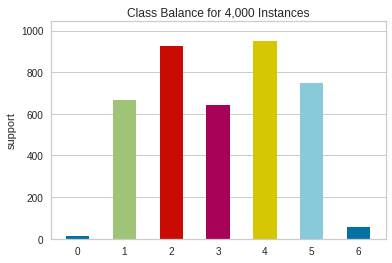

In [15]:
# https://www.scikit-yb.org/en/latest/api/target/class_balance.html
from yellowbrick.target import ClassBalance

viz = ClassBalance()
viz.fit(y)
viz.poof()

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc19b721860>,
             colormap=None, colors=None, labels=None)

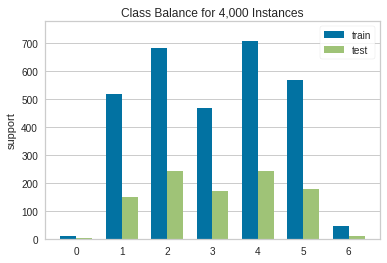

In [16]:
viz = ClassBalance()
viz.fit(y_train, y_test)
viz.poof()

FeatureCorrelation(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc19b6330f0>,
                   color=None, feature_index=None, feature_names=None,
                   labels=None, method='pearson', sort=True)

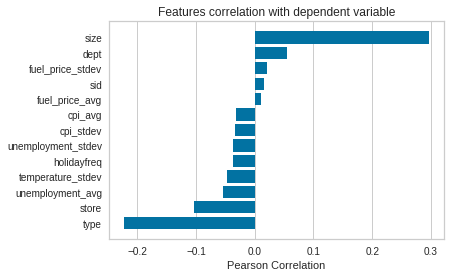

In [21]:
# https://www.scikit-yb.org/en/latest/api/target/feature_correlation.html
from yellowbrick.target import FeatureCorrelation

viz = FeatureCorrelation(method='pearson', sort=True)
viz.fit(X, y)
viz.poof()

FeatureCorrelation(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc19b51aac8>,
                   color=None, feature_index=None, feature_names=None,
                   labels=None, method='mutual_info-classification', sort=True)

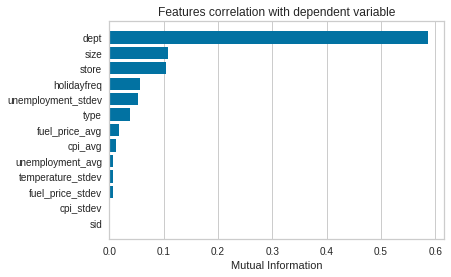

In [22]:
viz = FeatureCorrelation(method='mutual_info-classification', sort=True)
viz.fit(X, y)
viz.poof()

LearningCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc19b3ebeb8>,
              cv=StratifiedKFold(n_splits=12, random_state=None, shuffle=False),
              exploit_incremental_learning=False, groups=None, model=None,
              n_jobs=4, pre_dispatch='all', random_state=None,
              scoring='f1_weighted', shuffle=False,
              train_sizes=array([0.3       , 0.37777778, 0.45555556, 0.53333333, 0.61111111,
       0.68888889, 0.76666667, 0.84444444, 0.92222222, 1.        ]))

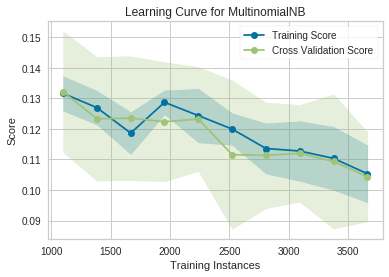

In [24]:
# https://www.scikit-yb.org/en/latest/api/model_selection/learning_curve.html
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB

from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
clf = MultinomialNB()
viz = LearningCurve(clf, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4)
viz.fit(X, y)
viz.poof()

ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc19a377e48>,
                cv=10, groups=None, logx=False, model=None, n_jobs=1,
                param_name='max_depth',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                pre_dispatch='all', scoring='r2')

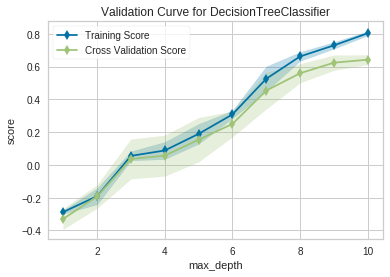

In [26]:
# https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
from yellowbrick.model_selection import ValidationCurve

from sklearn import tree
 
viz = ValidationCurve(
    tree.DecisionTreeClassifier(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)
viz.fit(X, y)
viz.poof()

FeatureImportances(absolute=False,
                   ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc19944d668>,
                   colormap=None, colors=None, is_fitted='auto', labels=None,
                   model=None, relative=False, stack=True, xlabel=None)

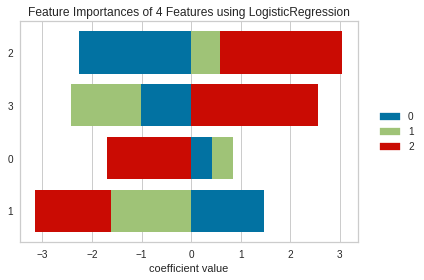

In [37]:
# https://www.scikit-yb.org/en/latest/api/model_selection/importances.html
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

data = load_iris()
X1, y1 = data.data, data.target

model = LogisticRegression(multi_class="auto", solver="liblinear")
viz = FeatureImportances(model, stack=True, relative=False)
viz.fit(X1, y1)
viz.poof()

array([[ 0.36045067, -0.33728955],
       [ 1.1741534 ,  0.77267099],
       [-1.23170749,  2.3093341 ],
       ...,
       [-1.97859532, -1.86485409],
       [-0.78101294,  3.55915215],
       [-1.22651472, -1.62362137]])

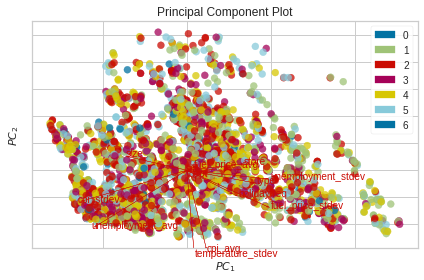

In [40]:
# https://www.scikit-yb.org/en/latest/api/features/pca.html
from yellowbrick.features.pca import PCADecomposition

# Like a R-like biplot: https://en.wikipedia.org/wiki/Biplot
viz = PCADecomposition(scale=True, proj_features=True, proj_dim=3)
viz.fit_transform(X, y)
viz.poof()

array([[117614.83  , -16862.889 ],
       [ 77597.29  ,  17453.686 ],
       [143829.84  ,  81095.195 ],
       ...,
       [-14925.985 , -69647.516 ],
       [-72556.83  , -81938.48  ],
       [-29975.943 ,  -2363.9968]], dtype=float32)

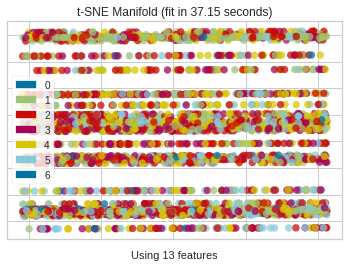

In [42]:
# https://www.scikit-yb.org/en/latest/api/features/manifold.html
from yellowbrick.features import Manifold

viz = Manifold(manifold="tsne")
viz.fit_transform(X, y)
viz.poof()  

ClassPredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1985f9550>,
                     classes=None, encoder=None, force_model=False,
                     is_fitted='auto', model=None)

0.513

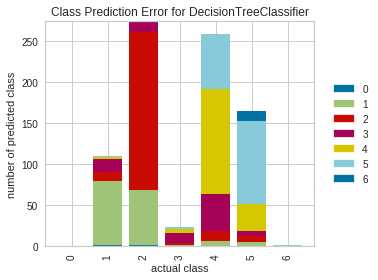

In [47]:
# https://www.scikit-yb.org/en/latest/api/classifier/class_prediction_error.html
from yellowbrick.classifier import ClassPredictionError

viz = ClassPredictionError(tree.DecisionTreeClassifier(max_depth=6))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc19839a828>,
                     classes=None,
                     cmap=<matplotlib.colors.ListedColormap object at 0x7fc198353748>,
                     encoder=None, force_model=False, is_fitted='auto',
                     model=None, support=True)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.356

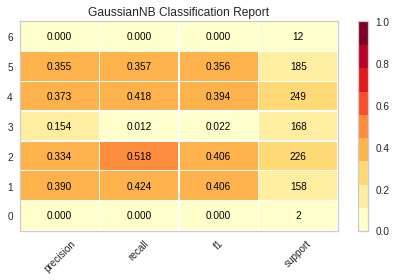

In [50]:
# https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html
from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import ClassificationReport

clf = GaussianNB()
viz = ClassificationReport(clf,support=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()    

ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc198126780>,
       classes=None, encoder=None, force_model=False, is_fitted='auto',
       macro=True, micro=True, model=None, per_class=True)

0.6573529177848212

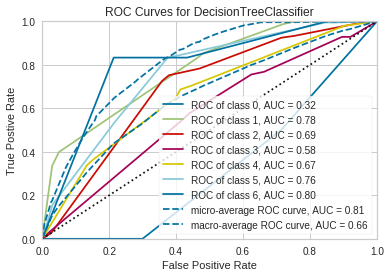

In [54]:
# https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html
from yellowbrick.classifier import ROCAUC

clf = tree.DecisionTreeClassifier(max_depth=3)
viz = ROCAUC(clf, multi_class="auto")

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()   

PrecisionRecallCurve(ap_score=True,
                     ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc18cf45278>,
                     classes=None, encoder=None, fill_area=False,
                     fill_opacity=0.2, force_model=False, is_fitted='auto',
                     iso_f1_curves=True, iso_f1_values={0.2, 0.4, 0.6, 0.8},
                     line_opacity=0.8, micro=False, model=None,
                     per_class=False)

0.41260416793631005

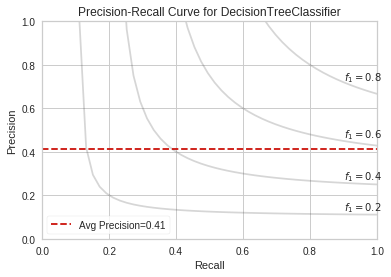

In [58]:
from yellowbrick.classifier import PrecisionRecallCurve

clf = tree.DecisionTreeClassifier(max_depth=3)
viz = PrecisionRecallCurve(clf, per_class=False, iso_f1_curves=True, fill_area=False, micro=False)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

PrecisionRecallCurve(ap_score=True,
                     ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc198056ac8>,
                     classes=None, encoder=None, fill_area=False,
                     fill_opacity=0.2, force_model=False, is_fitted='auto',
                     iso_f1_curves=True, iso_f1_values={0.2, 0.4, 0.6, 0.8},
                     line_opacity=0.8, micro=False, model=None, per_class=True)

0.41419230792326656

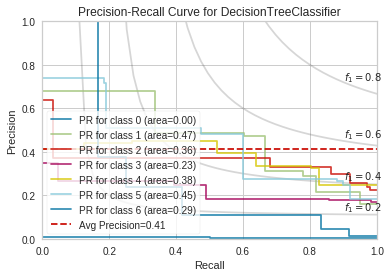

In [57]:
from yellowbrick.classifier import PrecisionRecallCurve

clf = tree.DecisionTreeClassifier(max_depth=3)
viz = PrecisionRecallCurve(clf, per_class=True, iso_f1_curves=True, fill_area=False, micro=False)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class DecisionBoundariesVisualizer is deprecated; Will be moved to yellowbrick.contrib in v0.8
  warnings.warn(msg, category=DeprecationWarning)


DecisionBoundariesVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1edcf8f98>,
                             classes=['A', 'B'], encoder=None, features=None,
                             force_model=False, is_fitted='auto',
                             markers=<itertools.cycle object at 0x7fa1edca6cf0>,
                             model=None, pcolormesh_alpha=0.8,
                             scatter_alpha=1.0, show_scatter=True,
                             step_size=0.0025, x=None, y=None)

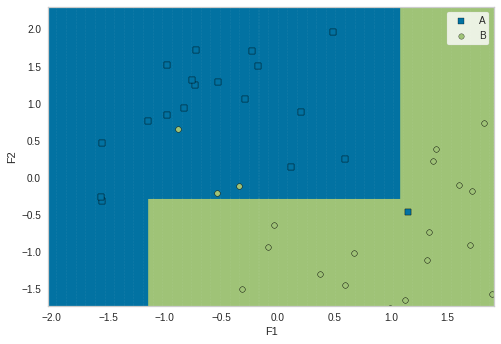

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

from yellowbrick.contrib.classifier import DecisionViz

X2, y2 = make_moons(noise=0.3, random_state=0)
X2 = StandardScaler().fit_transform(X)
X_2train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=.4, random_state=42)

clf = tree.DecisionTreeClassifier(max_depth=3)
viz = DecisionViz(clf, title="Decision Tree", features=['F1', 'F2'], classes=['A', 'B'])
viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
viz.poof()

Rank1D(algorithm=None,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7d79fae10>,
       color=None, features=None, orient=None, show_feature_names=None)

,sid,dept,store,type,size,temperature_stdev,fuel_price_avg,fuel_price_stdev,cpi_avg,cpi_stdev,unemployment_avg,unemployment_stdev,holidayfreq
7984,176648,26,17,2,93188,49.916667,6.437657,3.412667,0.515931,129.086919,2.351671,6.343000,0.719269
40285,214135,87,19,1,203819,36.476667,6.569477,3.418000,0.457003,134.150914,2.799883,8.021333,0.297342
18189,56101,23,32,1,203007,76.810000,4.660376,3.326667,0.553455,193.605161,3.949344,8.576333,0.465184
27644,373050,14,11,1,207499,67.396667,3.001422,3.343333,0.479651,218.737636,5.542034,7.242333,0.369434
6829,256040,85,25,2,128107,36.570000,8.788077,3.289000,0.442691,208.105559,4.805449,7.497000,0.627340
33305,303608,31,8,1,155078,80.943333,2.988450,3.174333,0.447129,219.759141,5.300735,6.047000,0.562149
40659,61616,81,23,2,114533,32.206667,9.358207,3.266667,0.434512,134.150914,2.799883,5.089000,0.815787
14506,299424,27,1,1,151315,48.240000,5.398176,2.953667,0.367750,214.531851,4.823835,7.732000,0.379099
28597,191852,21,40,1,155083,38.473333,13.714978,3.441667,0.531493,134.394546,2.840754,4.936667,0.606757
9936,369412,8,42,3,39690,75.643333,4.950478,3.656000,0.580700,129.086919,2.351671,7.940000,1.031585


/opt/conda/lib/python3.7/site-packages/yellowbrick/features/rankd.py:215: YellowbrickWarning: RankD plots may be clipped when using matplotlib v3.1.1, upgrade to matplotlib v3.1.2 or later to fix the plots.
  warnings.warn(msg, YellowbrickWarning)


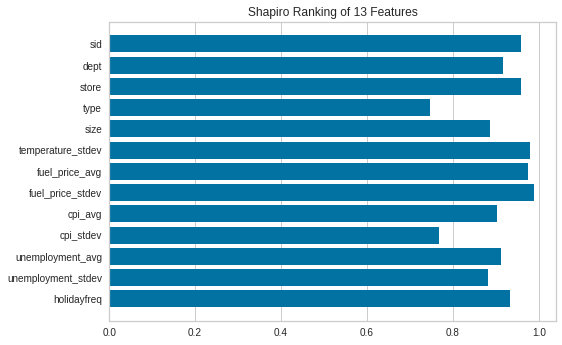

In [3]:
# https://www.scikit-yb.org/en/latest/api/features/rankd.html
from yellowbrick.features import Rank1D

viz = Rank1D(algorithm='shapiro')
viz.fit(X, y)
viz.transform(X)
viz.poof()  

Rank2D(algorithm=None,
       ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7d77fc320>,
       colormap='RdBu_r', features=None, show_feature_names=None)

,sid,dept,store,type,size,temperature_stdev,fuel_price_avg,fuel_price_stdev,cpi_avg,cpi_stdev,unemployment_avg,unemployment_stdev,holidayfreq
7984,176648,26,17,2,93188,49.916667,6.437657,3.412667,0.515931,129.086919,2.351671,6.343000,0.719269
40285,214135,87,19,1,203819,36.476667,6.569477,3.418000,0.457003,134.150914,2.799883,8.021333,0.297342
18189,56101,23,32,1,203007,76.810000,4.660376,3.326667,0.553455,193.605161,3.949344,8.576333,0.465184
27644,373050,14,11,1,207499,67.396667,3.001422,3.343333,0.479651,218.737636,5.542034,7.242333,0.369434
6829,256040,85,25,2,128107,36.570000,8.788077,3.289000,0.442691,208.105559,4.805449,7.497000,0.627340
33305,303608,31,8,1,155078,80.943333,2.988450,3.174333,0.447129,219.759141,5.300735,6.047000,0.562149
40659,61616,81,23,2,114533,32.206667,9.358207,3.266667,0.434512,134.150914,2.799883,5.089000,0.815787
14506,299424,27,1,1,151315,48.240000,5.398176,2.953667,0.367750,214.531851,4.823835,7.732000,0.379099
28597,191852,21,40,1,155083,38.473333,13.714978,3.441667,0.531493,134.394546,2.840754,4.936667,0.606757
9936,369412,8,42,3,39690,75.643333,4.950478,3.656000,0.580700,129.086919,2.351671,7.940000,1.031585


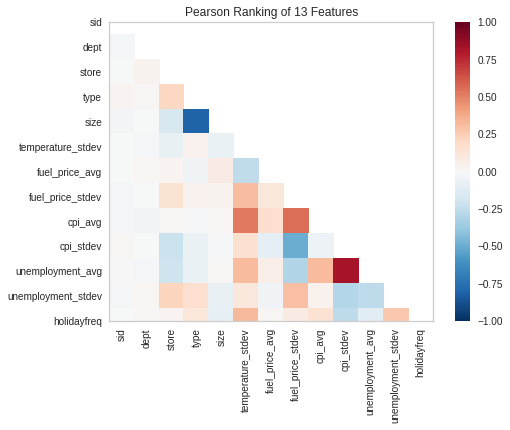

In [4]:
from yellowbrick.features import Rank2D

viz = Rank2D(algorithm='pearson')
viz.fit(X, y)
viz.transform(X)
viz.poof()